# Calculate the Marshall SAM Index

This is a test to see if my calculation of the marshall SAM index is the same as the published version

Idea stolen from nicki

https://github.com/nickywright/palaeoclimate-lastmillennium/blob/master/SAM%20-%20Marshall%20(2003).ipynb

In [1]:
import sys
sys.path.append(sys.path[0]+'/../..')


import utils.pslIndex as psl
import utils.climatology as climat

In [2]:
import xarray
import pandas
import matplotlib.pyplot as plt

In [3]:
#Idea stolen from nicki
#https://github.com/nickywright/palaeoclimate-lastmillennium/blob/master/SAM%20-%20Marshall%20(2003).ipynb

url_40 = 'http://www.nerc-bas.ac.uk/public/icd/gjma/l40.1957.2007.txt'
url_65 = 'http://www.nerc-bas.ac.uk/public/icd/gjma/l65.1957.2007.txt'
url_SAMindex = 'http://www.nerc-bas.ac.uk/public/icd/gjma/newsam.1957.2007.txt'

# import 40°S and 65°S data into pandas
m40 = pandas.read_csv(url_40, sep='\s+', header=0, index_col=0, skipinitialspace=True)
m65 = pandas.read_csv(url_65, sep='\s+', header=0, index_col=0, skipinitialspace=True)

# import the actual SAM index Marshall calculates
M03_SAMindex = pandas.read_csv(url_SAMindex, sep=' ', skipinitialspace=True)


In [4]:
# define an xarray of dates based on the imported data set.
# start at the first year (1957)
# finish at the last year (2021)
# dates are 1 month apart

dates = xarray.cftime_range(
    start=str(m40.index[0]), 
    end=str(m40.index[-1])+'-12-01', 
    freq="MS", 
    calendar="noleap")

In [5]:
# define some xarray datasets to put data in
ds40=xarray.Dataset()
ds65=xarray.Dataset()

# add data in the same format as if it were imported from CESM
ds40['PSL']=xarray.DataArray(m40.to_numpy().flatten(), coords={'time':dates, 'lat':-40, 'lon':0}, dims=['time'], name="Marshall P40")
ds65['PSL']=xarray.DataArray(m65.to_numpy().flatten(), coords={'time':dates, 'lat':-65, 'lon':0}, dims=['time'], name="Marshall P60")

In [6]:
ds=xarray.concat([ds40, ds65], dim='lat')

ds=ds.expand_dims('lon')

In [7]:
samIndex, normalised =psl.calculateSamIndex(ds, 1971, 2000)

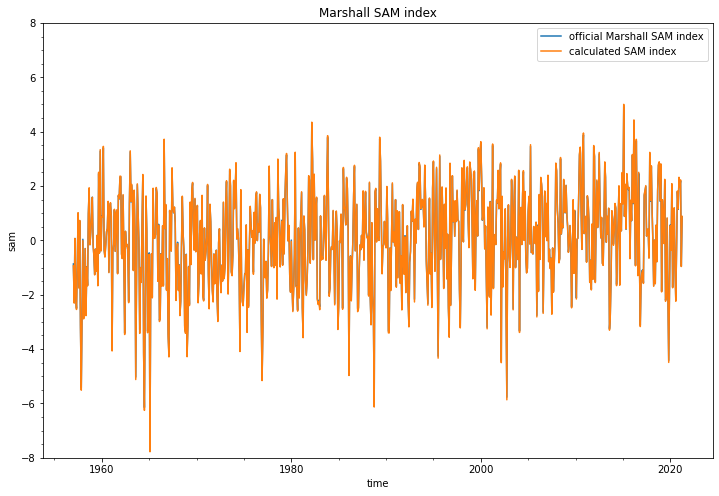

In [8]:
# Plot of the imported Marshall data
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
# I am using the same dates I used for the imported PSL, maybe I should calculate them some other way?
plt.plot(dates, M03_SAMindex.to_numpy().flatten(), label='official Marshall SAM index')

#Add the calculated sam index to the same plot
samIndex.plot(ax=ax, x='time', label='calculated SAM index')

#Tidy up a bit
plt.title("Marshall SAM index")
plt.ylim(-8,8)
plt.minorticks_on()
plt.legend()
